In [10]:
import sys, os
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
from astropy.table import Table, join, hstack, vstack
import pywt
import h5py
sys.path.insert(1, '/home/luiz/IC/Codes/GMCA/gmca4im-master/scripts/')
import gmca4im_lib2 as g4i
from scipy import signal
from sklearn.decomposition import FastICA, PCA
import Extension4BINGO as cs

In [11]:
######## FUNÇÔES
######################################################################################################
######## lê o arquivo .fits com os mapas e devolve o map com média 0
def load_map(file=str):
    with fits.open(file) as hdul:
        map = cs.remove_mean(hdul[0].data)
    return(map)
######################################################################################################

######################################################################################################
######## recebe um vetor com mapas e um vetor com titulos e plota
def plot_maps()

/home/luiz/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/home/luiz/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/luiz/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_

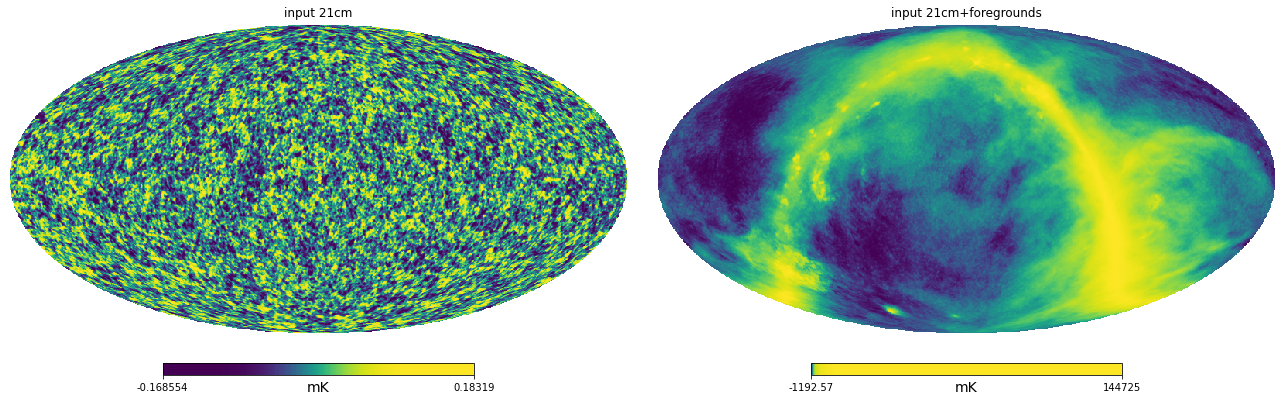

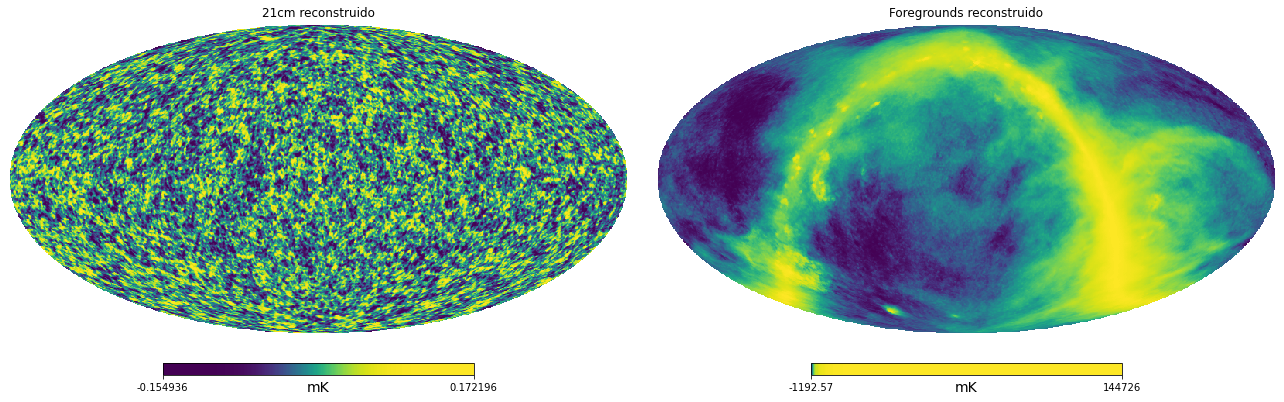

In [15]:
######## fastICA com wavelets
NSIDE = 2**8
######################################################################################################
######## Leitura dos arquivos
file_21cm = '/home/luiz/IC/Datas_Maps/Cube_21_L100_Smooth.fits' #Arquivo só com 21cm
file_X ='/home/luiz/IC/Datas_Maps/Cube_5PSM_L100_RS.fits' #Arquivo com tudo, foregrounds+21cm
input_21cm = load_map(file_21cm)
X = load_map(file_X)
######################################################################################################

######################################################################################################
######## Algoritmo fastICA para obter a matriz mistura aproximada
ica = FastICA(n_components=5)
Se = ica.fit_transform(X.T)  # Reconstruct signals
Ae = ica.mixing_  # Get estimated mixing matrix
######## Obtém os mapas separados em 21cm e foregrounds no dicionario X_rec
X_rec = cs.Reconstruction_maps(X, Ae)
######################################################################################################

######################################################################################################
######## Visualização dos mapas
plot = [input_21cm[13], X[13], X_rec['21cm'][13], X_rec['foregrounds'][13]] #vetor com os mapas
title = ["input 21cm", "input 21cm+foregrounds", "21cm reconstruido", "Foregrounds reconstruido"] #vetor com os nomes
plt.figure(figsize = (18,8))
for i in range(2):
        hp.mollview(plot[i], sub=(1,2,i+1), norm='hist', title=title[i], unit='mK' )
plt.figure(figsize = (18,8))
for i in range(2):
        hp.mollview(plot[i+2], sub=(1,2,i+1), norm='hist', title=title[i+2], unit='mK' )
######################################################################################################
